In [1]:
# randomly recommend games 

import random
 
results = {}  
# Initialize dictionary
games = {'Memory' : 'Spot the Difference', 'Number' : 'Find 10', 'Visual Attention':'Messy Room','Reaction Control': 'Giant Dwarf'}
 
# printing original dictionary
print("A dictionary of skill and game pairs in the model has: " + str(games))
 
# Get random dictionary pair in dictionary
# Using random.choice() + list() + items()


for _ in range(100):
    res = random.choice(list(games.items()))

    if res in results:
        results[res] += 1
    else:
        results[res] = 1

# Print the results
for res, count in results.items():
    print("The random pair is:", res)
    print("Count:", count)
    print()
    
    

A dictionary of skill and game pairs in the model has: {'Memory': 'Spot the Difference', 'Number': 'Find 10', 'Visual Attention': 'Messy Room', 'Reaction Control': 'Giant Dwarf'}
The random pair is: ('Reaction Control', 'Giant Dwarf')
Count: 23

The random pair is: ('Number', 'Find 10')
Count: 25

The random pair is: ('Visual Attention', 'Messy Room')
Count: 26

The random pair is: ('Memory', 'Spot the Difference')
Count: 26



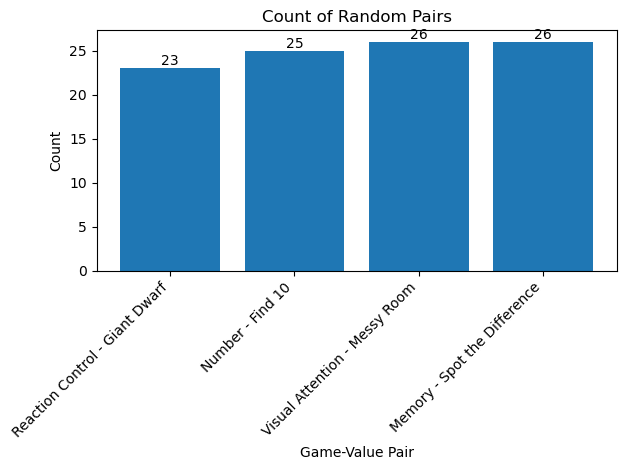

In [2]:
#Visualise the result 
import matplotlib.pyplot as plt

# Extract the x-axis labels and corresponding counts
labels = [f"{res[0]} - {res[1]}" for res in results.keys()]
counts = list(results.values())

# Create the bar plot
plt.bar(labels, counts)

# Customize the plot
plt.xlabel('Game-Value Pair')
plt.ylabel('Count')
plt.title('Count of Random Pairs')
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
# Reinforcement learning 

# Based on the game-based assessment results, 
# each kid gets a score on the following 4 categories:
# i.e. Reaction Control, Memory, Visual Attention, Number, 
# each one is scored on a scale of 1-10 1 being the lowest and 10 being the highest.  

# Assume each kid has the same level of strength for every area, meaning each game is equally likely to be chosen, as shown in the first example
# Once the first assessment results come out, the model will update the weights in each area. 
# It will increase the weights of those games which the kid scores low so it has a higher probability to be recommended to the kid and vice versa

# Example 1: consider a kid who's scores are as follow:
# Reaction Control : 3, Memory: 9, Visual Attention: 6, Number: 7
# We should expect the Giant Dwarf game more frequently recommended (our website will have a direct link provided for the game)
score = {"Reaction Control" : 3, "Memory": 9, "Visual Attention": 6, "Number": 7}
n = 4
weights = {"Reaction Control" : 1, "Memory": 1, "Visual Attention": 1, "Number": 1}
print (weights)
# Calculate the total weight
total_weight = sum(weights.values())

# Update the weights proportionately based on scores
for category, category_score in score.items():
    weights[category] /= category_score
    

# Normalize the weights
total_updated_weight = sum(weights.values())
normalized_weights = {category: weight / total_updated_weight for category, weight in weights.items()}

print("Updated Weights:", normalized_weights)


    

{'Reaction Control': 1, 'Memory': 1, 'Visual Attention': 1, 'Number': 1}
Updated Weights: {'Reaction Control': 0.4421052631578947, 'Memory': 0.14736842105263157, 'Visual Attention': 0.22105263157894736, 'Number': 0.18947368421052632}


In [4]:
from collections import Counter
games = {'Reaction Control': 'Giant Dwarf','Memory' : 'Spot the Difference', 'Visual Attention':'Messy Room','Number' : 'Find 10',}
# Repeat the selection process for 100 times and count the games
selections = []
for _ in range(100):
    selected_game = random.choices(list(games.values()), list(normalized_weights.values()))[0]
    selections.append(selected_game)

game_counts = Counter(selections)

print("Game Counts:", game_counts)

Game Counts: Counter({'Giant Dwarf': 47, 'Messy Room': 22, 'Find 10': 19, 'Spot the Difference': 12})


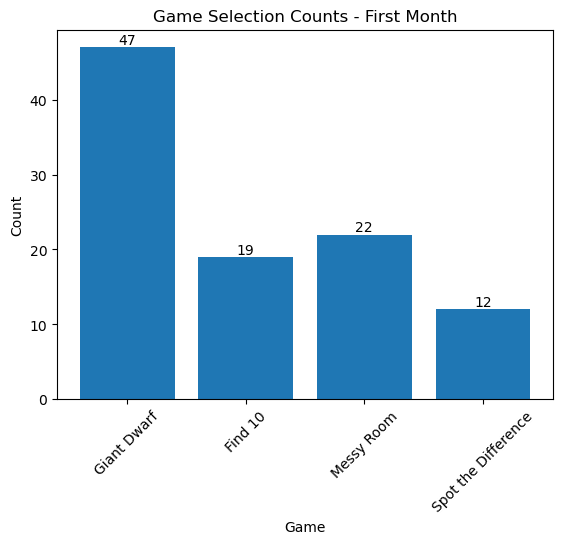

In [7]:
# Extract game names and counts from game_counts dictionary
games = list(game_counts.keys())
counts = list(game_counts.values())

# Create a bar plot of the game counts
plt.bar(games, counts)
plt.xlabel('Game')
plt.ylabel('Count')
plt.title('Game Selection Counts - First Month')
plt.xticks(rotation=45)

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

In [8]:
# After using this platform for a month, the kid is reassessed using the game-based assessment.
# The results showed a massive improvement in the Reaction Control area.
# The scores are as follow: 
# Reaction Control : 7, Memory: 8, Visual Attention: 5, Number: 7
# Update the weights proportionately based on scores

score = {"Reaction Control" : 9, "Memory": 9, "Visual Attention": 5, "Number": 7}
for category, category_score in score.items():
    normalized_weights[category] /= category_score
    

# Normalize the weights
total_updated_weight = sum(normalized_weights.values())
total_updated_weight
normalized_weights = {category: weight / total_updated_weight for category, weight in normalized_weights.items()}

print("Updated Weights:", normalized_weights)


Updated Weights: {'Reaction Control': 0.3591497678964085, 'Memory': 0.11971658929880283, 'Visual Attention': 0.32323479110676767, 'Number': 0.19789885169802102}


In [9]:
from collections import Counter
games = {'Reaction Control': 'Giant Dwarf','Memory' : 'Spot the Difference', 'Visual Attention':'Messy Room','Number' : 'Find 10',}
# Repeat the selection process for 100 times and count the games
selections = []
for _ in range(100):
    selected_game = random.choices(list(games.values()), list(normalized_weights.values()))[0]
    selections.append(selected_game)

game_counts = Counter(selections)

print("Game Counts:", game_counts)

Game Counts: Counter({'Messy Room': 39, 'Giant Dwarf': 32, 'Find 10': 18, 'Spot the Difference': 11})


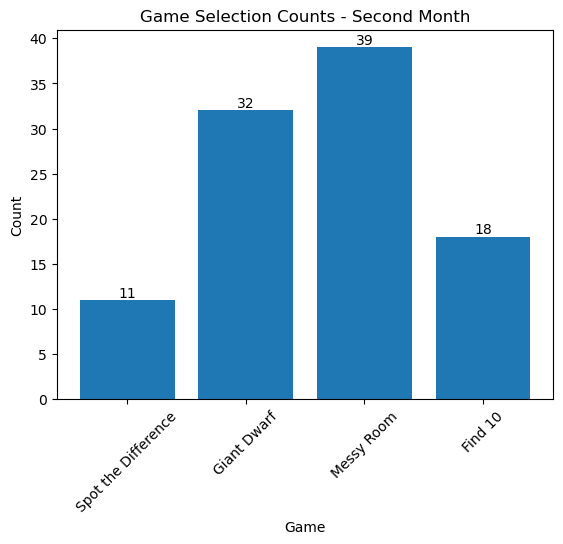

In [10]:
# Extract game names and counts from game_counts dictionary
games = list(game_counts.keys())
counts = list(game_counts.values())

# Create a bar plot of the game counts
plt.bar(games, counts)
plt.xlabel('Game')
plt.ylabel('Count')
plt.title('Game Selection Counts - Second Month')
plt.xticks(rotation=45)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
# Display the plot
plt.show()

In [ ]:
#Observation: 
# The model downgraded the weighting for the Giant Dwarf game after 
# observing significant improvements(from 3 to 7) in the child's reaction control score, 
# leading to an increase in counts in the other three games.

# Features that have yet to be implemented in the code: 
# 1. Assessment Style Optimization: RL models can learn to identify the assessment styles 
# in which children tend to perform best. By collecting data on children's performance 
# across different assessment styles, the RL model can discover patterns and preferences. 

